In [18]:
!pip install nltk spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 30.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.0/182.0 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.2/157.2 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.3/409.3 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.9/490.9 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.1/920.1 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [34]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize, sent_tokenize
from spacy.lang.en.stop_words import STOP_WORDS as en_stop
import matplotlib.pyplot as plt
punctuation = list(",./;'[]!@#$%^&*()_+\\<>?:\"{}|~`-–") 

In [2]:
df = pd.read_csv('../data/dataset.csv', index_col=0)

In [3]:
df

,id,url,title,text,category
416,26941,https://en.wikipedia.org/wiki/Spike%20Lee,Spike Lee,"Shelton Jackson ""Spike"" Lee (born March 20, 19...",actors
697,43337,https://en.wikipedia.org/wiki/Katharine%20Hepburn,Katharine Hepburn,"Katharine Houghton Hepburn (May 12, 1907 – Jun...",actors
1168,78127,https://en.wikipedia.org/wiki/James%20Doohan,James Doohan,"James Montgomery Doohan (; March 3, 1920 – Jul...",actors
1317,89695,https://en.wikipedia.org/wiki/William%20Christ...,William Christopher,"William Christopher (October 20, 1932 Decembe...",actors
1442,96406,https://en.wikipedia.org/wiki/Richard%20Greene,Richard Greene,Richard Marius Joseph Greene (25 August 1918 –...,actors
...,...,...,...,...,...
198385,68565885,https://en.wikipedia.org/wiki/1992%20Nigerian%...,1992 Nigerian Senate elections in Delta State,The 1992 Nigerian Senate election in Delta Sta...,events
199111,68862408,https://en.wikipedia.org/wiki/2022%20Valenzuel...,2022 Valenzuela local elections,Local elections will be held in Valenzuela on ...,events
199302,68973980,https://en.wikipedia.org/wiki/Sara%20Bay%20Cla...,Sara Bay Classic,The Sara Bay Classic was a tournament on the S...,events
200401,69486421,https://en.wikipedia.org/wiki/List%20of%20eart...,List of earthquakes in Malaysia,This is a list of earthquakes in Malaysia:\n\n...,events


In [4]:
corpus = "".join(df["text"])

In [5]:
len(corpus)

751253112

In [11]:
sentences = sent_tokenize(corpus)

In [12]:
len(sentences)

5117179

In [13]:
words = word_tokenize(corpus)

In [14]:
len(words)

138535433

In [44]:
hist = {}

for word in words:
    lowered = word.lower()
    if hist.get(lowered) is None:
        hist[lowered] = 0
    hist[lowered] += 1

In [45]:
sorted_hist = dict(reversed(sorted(hist.items(), key=lambda item: item[1])))

In [46]:
len(sorted_hist)

1828937

In [47]:
for k,v in sorted_hist.items():
    if k in en_stop or any(punkt in k for punkt in punctuation):
        sorted_hist[k] = 0
sorted_hist = dict(reversed(sorted(sorted_hist.items(), key=lambda item: item[1])))

In [48]:
sorted_hist

{'new': 243810,
 'american': 218911,
 'game': 180376,
 'film': 180003,
 'people': 179206,
 'references': 176519,
 'films': 147612,
 'games': 146086,
 'time': 137277,
 'united': 124288,
 'university': 124185,
 'city': 123137,
 'world': 120462,
 'released': 115502,
 'later': 107353,
 'states': 105694,
 'years': 105165,
 'national': 104260,
 'state': 104217,
 'external': 103833,
 'links': 102931,
 'video': 102792,
 'music': 101569,
 'series': 99967,
 'album': 97593,
 'party': 93795,
 'year': 92077,
 'war': 90745,
 'life': 90488,
 'born': 85852,
 'de': 84372,
 'known': 82218,
 'school': 82082,
 'including': 82027,
 'government': 78812,
 'work': 78289,
 'history': 75297,
 'second': 75090,
 'women': 75083,
 '2': 74905,
 '1': 74729,
 'book': 74608,
 'early': 74196,
 'song': 73827,
 'family': 72864,
 'best': 69173,
 'south': 68960,
 'john': 67932,
 'players': 67769,
 'york': 67566,
 'living': 67554,
 'number': 67051,
 'members': 66738,
 'career': 66484,
 'called': 66399,
 'group': 66154,
 'mar

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'new'),
  Text(1, 0, 'american'),
  Text(2, 0, 'game'),
  Text(3, 0, 'film'),
  Text(4, 0, 'people'),
  Text(5, 0, 'references'),
  Text(6, 0, 'films'),
  Text(7, 0, 'games'),
  Text(8, 0, 'time'),
  Text(9, 0, 'united'),
  Text(10, 0, 'university'),
  Text(11, 0, 'city'),
  Text(12, 0, 'world'),
  Text(13, 0, 'released'),
  Text(14, 0, 'later'),
  Text(15, 0, 'states'),
  Text(16, 0, 'years'),
  Text(17, 0, 'national'),
  Text(18, 0, 'state'),
  Text(19, 0, 'external'),
  Text(20, 0, 'links'),
  Text(21, 0, 'video'),
  Text(22, 0, 'music'),
  Text(23, 0, 'series'),
  Text(24, 0, 'album'),
  Text(25, 0, 'party'),
  Text(26, 0, 'year'),
  Text(27, 0, 'war'),
  Text(28, 0, 'life'),
  Text(29, 0, 'born')])

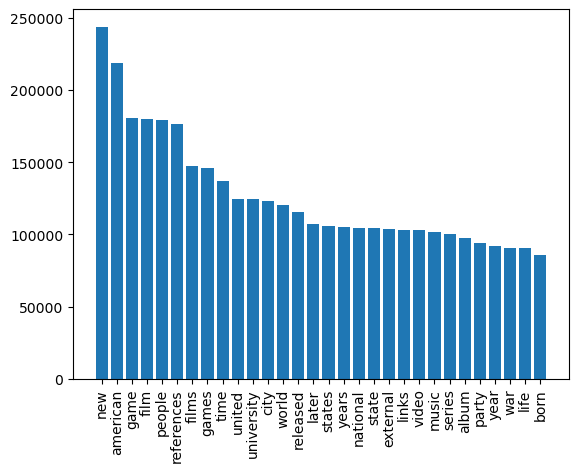

In [49]:
sliced_hist = dict(list(sorted_hist.items())[:30])
labels = list(sliced_hist)
values = [ sliced_hist[k] for k in list(sliced_hist)]
plt.bar(range(len(values)), values, align='center')
plt.xticks(range(len(labels)), labels)
plt.xticks(rotation=90)
#plt.bar(values, labels=labels, autopct = lambda x: str(int(x / 100 * sum(values))), pctdistance = 0.85, labeldistance = 1.2)